In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/owlxshri/Desktop/coral reef/mlpr-project/finaldata/bleaching_data.csv")

# Basic Data Inspection
print("First 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())
print("\nMissing values check:")
print(df.isnull().sum())


First 5 rows:
   Date_Month  Date_Year  Bleaching                  Reef_Name
0           5       1998          1  Andaman & Nicobar Islands
1           3       1998          1  Andaman & Nicobar Islands
2           4       1998          1  Andaman & Nicobar Islands
3           4       2016          1  Andaman & Nicobar Islands
4           5       2016          1  Andaman & Nicobar Islands

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date_Month  54 non-null     int64 
 1   Date_Year   54 non-null     int64 
 2   Bleaching   54 non-null     int64 
 3   Reef_Name   54 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.8+ KB
None

Descriptive statistics:
       Date_Month    Date_Year  Bleaching
count   54.000000    54.000000       54.0
mean     4.870370  2007.962963        1.0
std      0.972185     7.187418        0.0
min

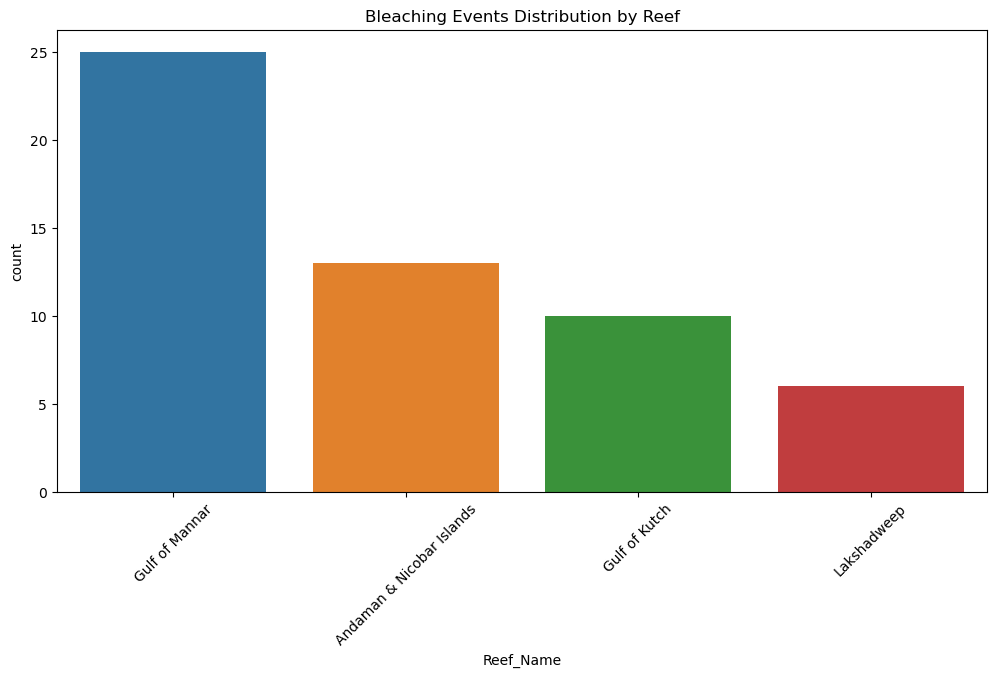

In [5]:
# Bleaching Events Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Reef_Name', order=df['Reef_Name'].value_counts().index)
plt.title('Bleaching Events Distribution by Reef')
plt.xticks(rotation=45)
plt.show()

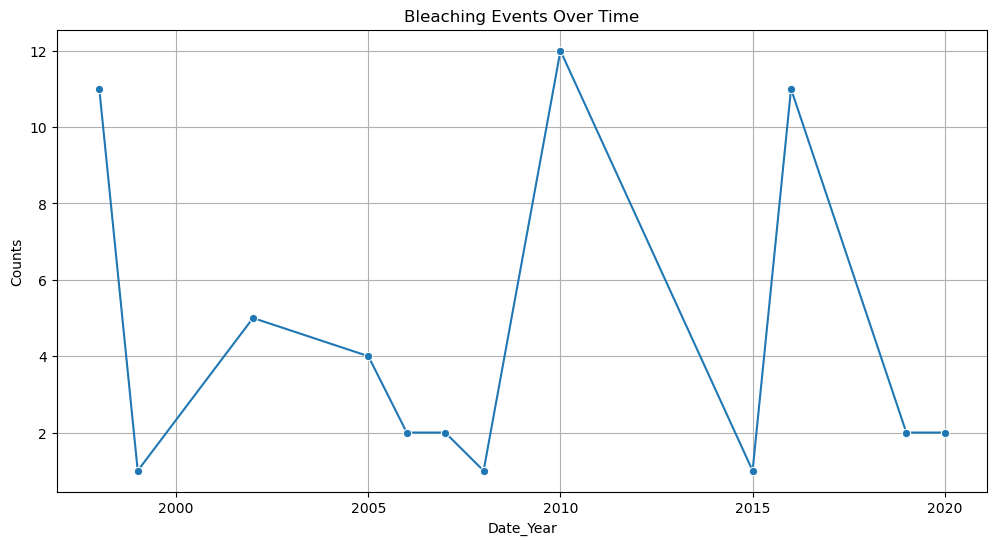

In [6]:
# Temporal Analysis
plt.figure(figsize=(12, 6))
yearly_counts = df.groupby('Date_Year').size().reset_index(name='Counts')
sns.lineplot(data=yearly_counts, x='Date_Year', y='Counts', marker='o')
plt.title('Bleaching Events Over Time')
plt.grid(True)
plt.show()

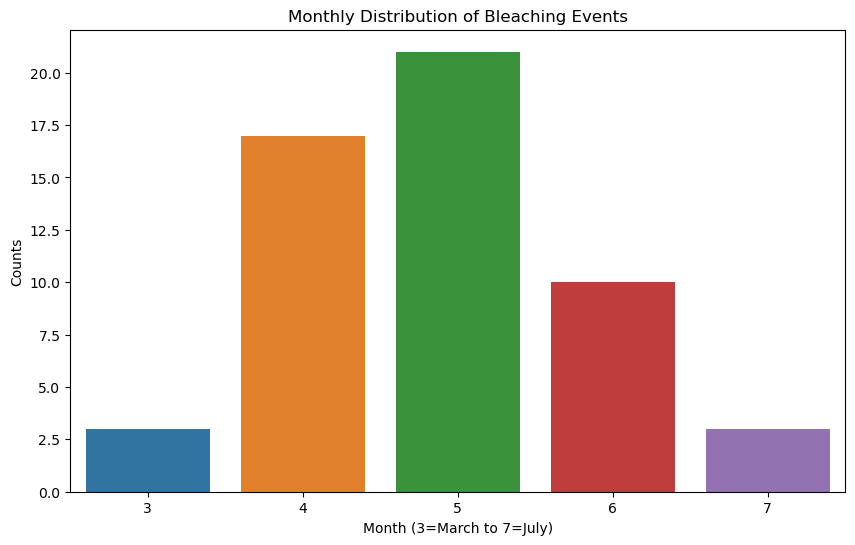

In [7]:
# Monthly Analysis
plt.figure(figsize=(10, 6))
monthly_counts = df.groupby('Date_Month').size().reset_index(name='Counts')
sns.barplot(data=monthly_counts, x='Date_Month', y='Counts', order=range(3, 8))
plt.title('Monthly Distribution of Bleaching Events')
plt.xlabel('Month (3=March to 7=July)')
plt.show()

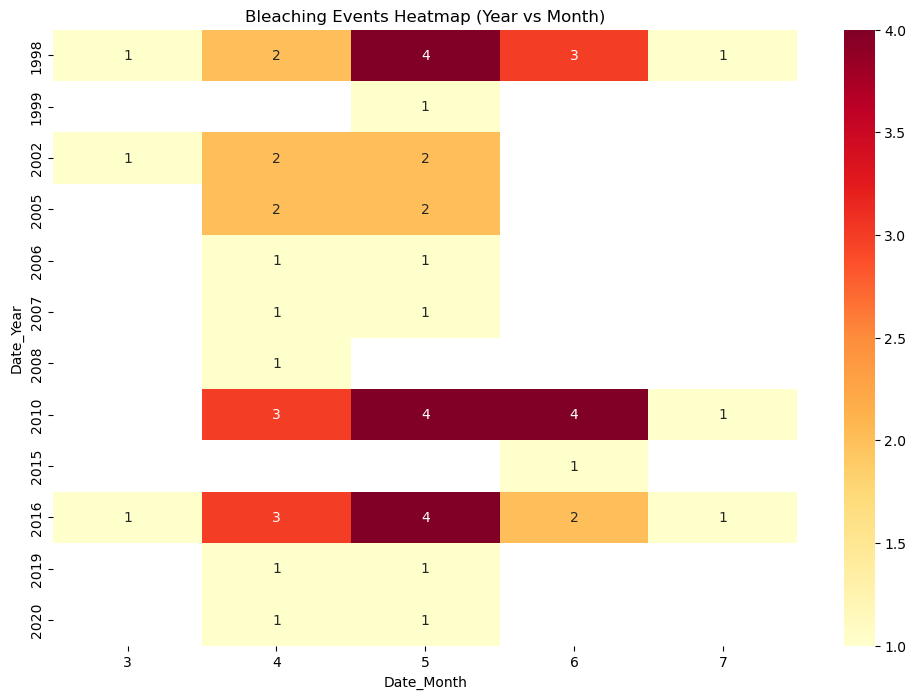

In [8]:
# Combined Year-Month Analysis
heatmap_data = df.groupby(['Date_Year', 'Date_Month']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Bleaching Events Heatmap (Year vs Month)')
plt.show()

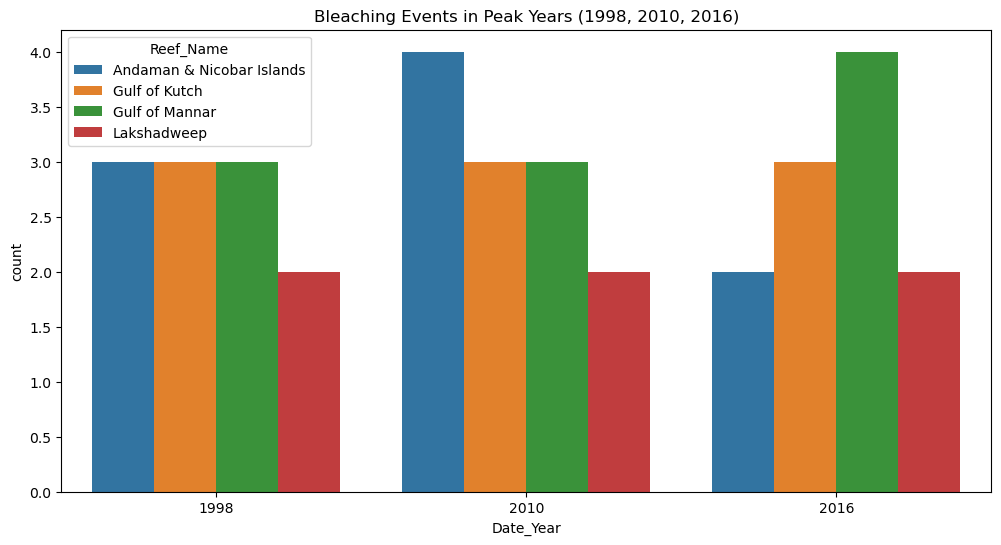

In [9]:
# Peak Year Analysis
peak_years = df[df['Date_Year'].isin([1998, 2010, 2016])]
plt.figure(figsize=(12, 6))
sns.countplot(data=peak_years, x='Date_Year', hue='Reef_Name')
plt.title('Bleaching Events in Peak Years (1998, 2010, 2016)')
plt.show()
